In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
# Step 1: Define registers
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

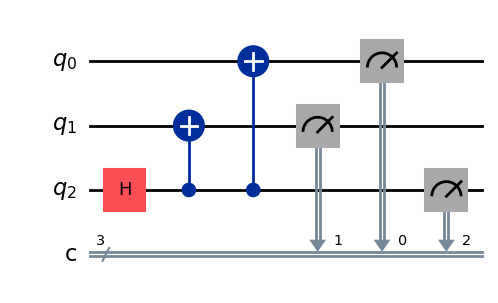

In [5]:
# Step 2: Build the circuit
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw('mpl')

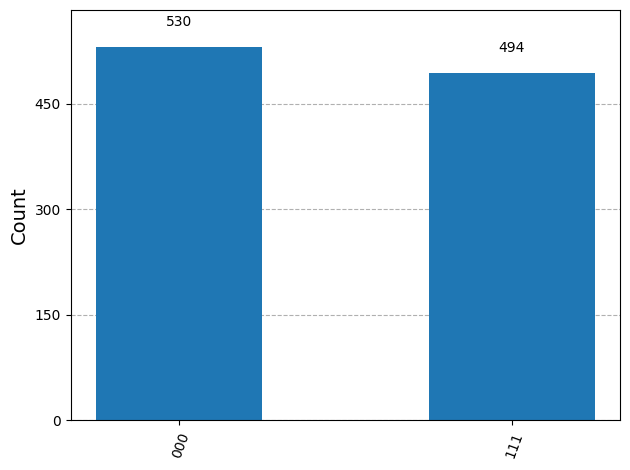

In [6]:
# Step 3: Run using Sampler and get results
sampler = Sampler()
job = sampler.run([circuit], shots=1024)
result = job.result()[0]
# Step 4: Extract data and plot histogram
counts = result.data.c.get_counts()
plot_histogram(counts)
